# SVM Classification

## Load Dataset

In [1]:
# Load dataset
from seaborn import load_dataset

df = load_dataset('penguins')
df = df.dropna()

In [2]:
# binary classification을 위해 ['Adelie', 'Gentoo', 'Chinstrap'] 중 'Gentoo' 제외
df = df[df['species'] != 'Gentoo']

# 2차원 평면에 나타내기 위해 feature 2개만 사용
feature_name = ['bill_length_mm', 'bill_depth_mm']
data = df[feature_name].to_numpy()

# target이 string이므로 0,1의 int로 변환
target = df['species']
for idx, value in enumerate(target.unique()):
    target = target.replace(value, idx)
target = target.to_numpy()

## Model Training

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=3) # 데이터 분할

In [4]:
from svm import SVMClassifier # SVM Classifier
from sklearn.metrics import classification_report

clf = SVMClassifier()
clf.fit(X_train, y_train) # 분류기 훈련
y_pred = clf.predict(X_test) # 예측값 추론
print("Accuracy: ", clf.get_accuracy(y_test, y_pred))

Accuracy:  0.9384615384615385


In [5]:
print(classification_report(y_test, y_pred, digits=4)) # 결과 리포트

              precision    recall  f1-score   support

           0     0.9512    0.9512    0.9512        41
           1     0.9167    0.9167    0.9167        24

    accuracy                         0.9385        65
   macro avg     0.9339    0.9339    0.9339        65
weighted avg     0.9385    0.9385    0.9385        65



# Visualization

In [6]:
coef, interrupt = clf.fit(X_train, y_train)

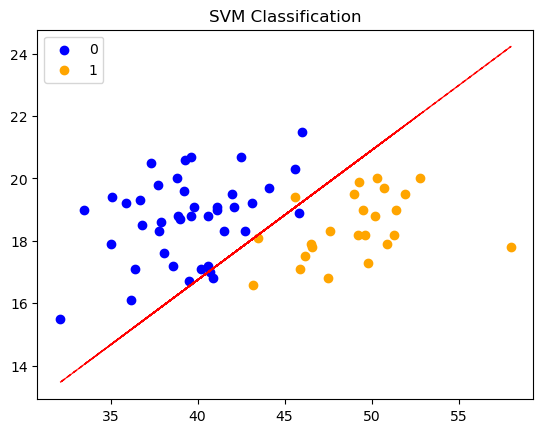

In [7]:
clf.visualization(X_test, y_test, coef, interrupt)